<a href="https://colab.research.google.com/github/Yogita98/tensorflow-model-deployment/blob/master/column_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [ ]:
DATADIR = "/home/yogita/CereLabs/Dataset"

CATEGORIES = ["Amount", "Captions", "Sr.No"]

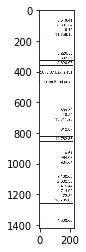

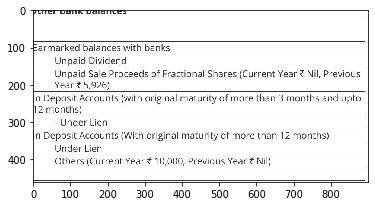

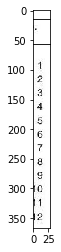

In [ ]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show() 

        break  # we just want one for now so break

In [ ]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
print(img_array.shape)

(367, 29)


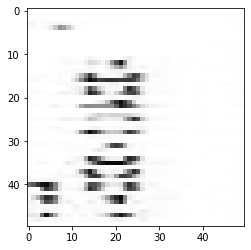

In [ ]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  
        print(class_num)

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass

create_training_data()

print(len(training_data))

 12%|█▏        | 74/613 [00:00<00:00, 722.49it/s]

0


 10%|▉         | 29/299 [00:00<00:00, 286.76it/s]

1


100%|██████████| 74/74 [00:00<00:00, 1681.19it/s]

2
986


In [ ]:
import random

random.shuffle(training_data)


In [ ]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
2
2
0
0
0
2
0


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[173]
   [237]
   [190]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [254]]

  [[250]
   [ 81]
   [ 65]
   ...
   [255]
   [255]
   [252]]

  ...

  [[243]
   [ 82]
   [160]
   ...
   [255]
   [255]
   [252]]

  [[255]
   [253]
   [254]
   ...
   [255]
   [255]
   [252]]

  [[254]
   [ 89]
   [ 89]
   ...
   [255]
   [255]
   [252]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
!pip install tensorflow-gpu==1.15

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('softmax'))
# model.add(Activation('sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 690 samples, validate on 296 samples
Epoch 1/10
690/690 [==============================] - 14s 20ms/sample - loss: 1.1196 - acc: 0.6377 - val_loss: 0.5238 - val_acc: 0.8750
Epoch 2/10
690/690 [==============================] - 14s 20ms/sample - loss: 0.3563 - acc: 0.8797 - val_loss: 0.3218 - val_acc: 0.8851
Epoch 3/10
690/690 [==============================] - 14s 20ms/sample - loss: 0.2907 - acc: 0.8870 - val_loss: 0.2512 - val_acc: 0.9291
Epoch 4/10
690/690 [==============================] - 14s 20ms/sample - loss: 0.2350 - acc: 0.9174 - val_loss: 0.2269 - val_acc: 0.9291
Epoch 5/10
690/690 [==============================] - 15s 22ms/sample - loss: 0.2051 - acc: 0.9304 - val_loss: 0.3448 - val_acc: 0.8953
Epoch 6/10
690/690 [==============================] - 14s 21ms/sample - loss: 0.2512 - acc: 0.9174 - val_loss: 0.2301 - val_acc: 0.9257
Epoch 7/10
690/690 [==============================] - 15s

In [ ]:
# !mkdir -p /home/yogita/CereLabs/models
tf.saved_model.save(model,'/home/yogita/CereLabs/models/served/1/') 

INFO:tensorflow:Assets written to: /home/yogita/CereLabs/models/served/1/assets


INFO:tensorflow:Assets written to: /home/yogita/CereLabs/models/served/1/assets


In [ ]:
!ls /home/yogita/CereLabs/models/served/1

assets	saved_model.pb	variables


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/home/yogita/CereLabs/models/served/1')

# Check its architecture
new_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________